In [4]:
import pandas as pd
import numpy as np
import time

dataset_process = pd.read_csv("PCA_4_acelerações.csv", delimiter=';')
X = dataset_process.loc[: , dataset_process.columns != 'failure'].values
y = dataset_process["failure"].values

len(dataset_process.columns)

4

In [5]:
display(dataset_process)

,principal component 1,principal component 2,load,failure
0,-1.04,-1.37,0,0
1,-0.25,-1.20,0,0
2,-1.43,-1.18,0,0
3,-0.66,-1.11,0,0
4,-0.23,-0.90,0,0
...,...,...,...,...
2004,-0.28,1.07,90,1
2005,-1.20,0.64,90,1
2006,-0.38,1.26,90,1
2007,-0.06,1.02,90,1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
len(X_train)

1607

In [9]:
len(X_test)

402

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.score(X_test, y_test)

1.0

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[199,   0],
       [  0, 203]], dtype=int64)

Text(42.0, 0.5, 'Truth')

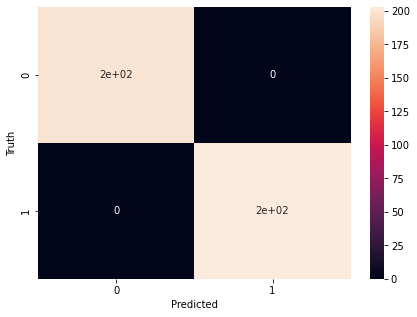

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       203

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



In [16]:
knn.predict([[-1.2,0.7,30]])

array([1], dtype=int64)

In [17]:
df0 = dataset_process[:1009]
df1 = dataset_process[1009:]


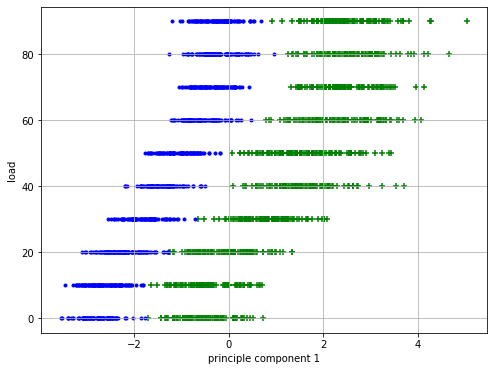

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
#plt.scatter(X[:,0],X[:,2])
plt.scatter(df0['principal component 1'], df0['load'],color="green",marker='+')
plt.scatter(df1['principal component 1'], df1['load'],color="blue",marker='.')
plt.ylabel('load')
plt.xlabel('principle component 1')
plt.grid()
